In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/medical-insurance-cost-prediction/medical_insurance.csv


# **Load and explore dataset**

In [2]:
import pandas as pd 
data=pd.read_csv('/kaggle/input/medical-insurance-cost-prediction/medical_insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


**Missing values**

In [4]:
missing_values = data.isnull().sum()
missing_values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**Distribution of categorical variables**

In [5]:
categorical_features = [column for column in data if data[column].dtype=='object'] 
for feature in categorical_features:
    print("Distribution of feature:", feature)
    print(data[feature].value_counts())
    print("\n")

Distribution of feature: sex
sex
male      1406
female    1366
Name: count, dtype: int64


Distribution of feature: smoker
smoker
no     2208
yes     564
Name: count, dtype: int64


Distribution of feature: region
region
southeast    766
southwest    684
northwest    664
northeast    658
Name: count, dtype: int64




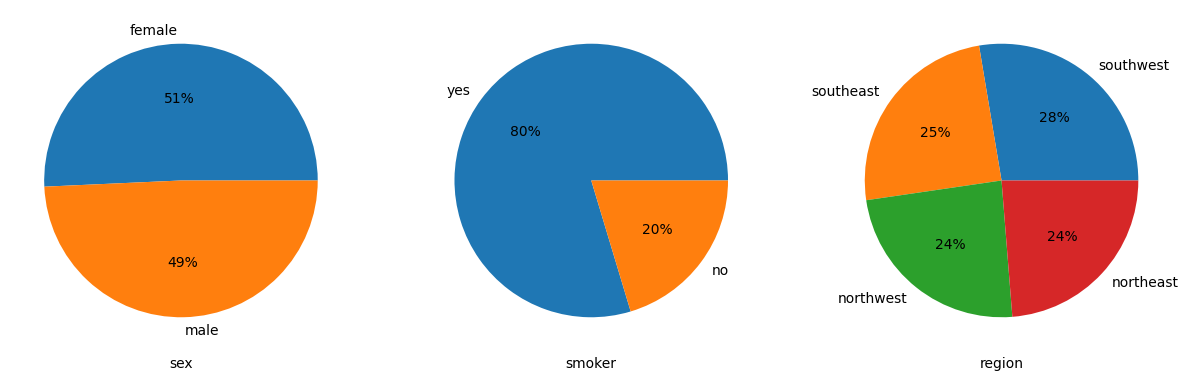

In [6]:
import matplotlib.pyplot as plt
_, ax = plt.subplots(1, 3, figsize=(15,10))
for i in range(len(categorical_features)):
    fracs=list(data[categorical_features[i]].value_counts().values)
    ax[i].pie(x=fracs,labels=data[categorical_features[i]].unique(),autopct='%.0f%%')
    ax[i].set_xlabel(categorical_features[i])

**Age distribution histogram **

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Count'>

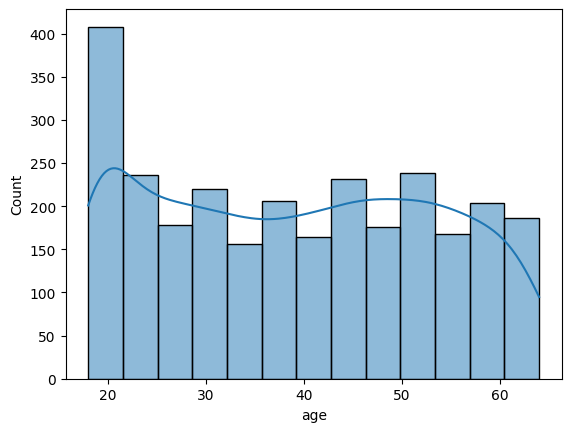

In [7]:
import seaborn as sns
sns.histplot(data['age'], kde=True)

**Boxplot by Smoking status**

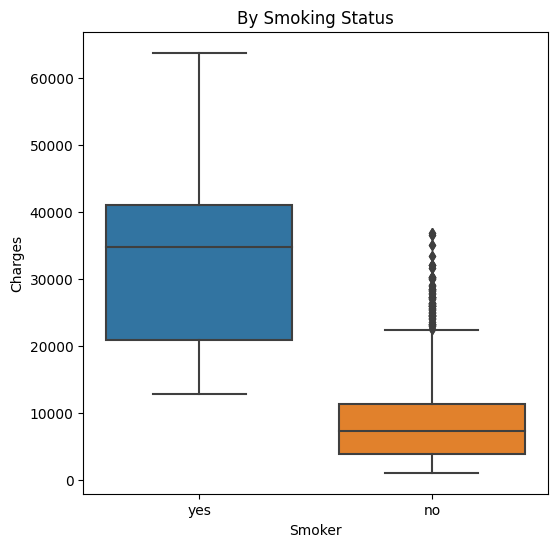

In [8]:
plt.figure(figsize=(6, 6))
sns.boxplot(x='smoker', y='charges', data=data)
plt.title('By Smoking Status')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()

**Boxplot by Region**

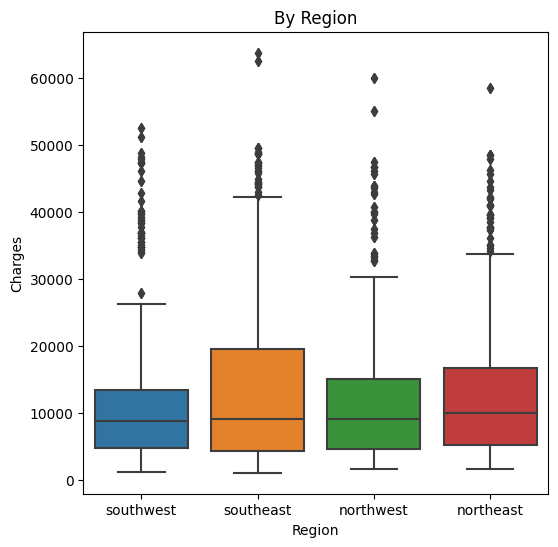

In [9]:
plt.figure(figsize=(6, 6))
sns.boxplot(x='region', y='charges', data=data)
plt.title('By Region')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.show()

# **Preprocess dataset**

**Encode categorical features**

In [10]:
from sklearn.preprocessing import LabelEncoder
to_encode = categorical_features

encoders = {}

for column in to_encode:
    if column in data.columns:
        encoder = LabelEncoder()
        data[column] = encoder.fit_transform(data[column])
        encoders[column] = encoder
        
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
2767,47,0,45.320,1,0,2,8569.86180
2768,21,0,34.600,0,0,3,2020.17700
2769,19,1,26.030,1,1,1,16450.89470
2770,23,1,18.715,0,0,1,21595.38229


# **Make predictions**

In [11]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNet, BayesianRidge
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

**Set prediction target**

In [12]:
X = data.drop('charges', axis=1)
y = data['charges']

**Scale data**

In [13]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

**Split data set in train and test sets**

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# **Linear Regression Model**

**Results**

In [15]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print("W coefficients: ", lr.coef_)
print("W0 intercept: ", lr.intercept_)

lr_pred = lr.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_pred)
print("Mean Squared Error (Linear Regression):", lr_mse)

W coefficients:  [ 1.15007770e+04 -2.32974479e+01  1.22636508e+04  2.66248894e+03
  2.40964275e+04 -1.09377616e+03]
W0 intercept:  -1754.7808759852614
Mean Squared Error (Linear Regression): 38340753.89436657


**Visualization**

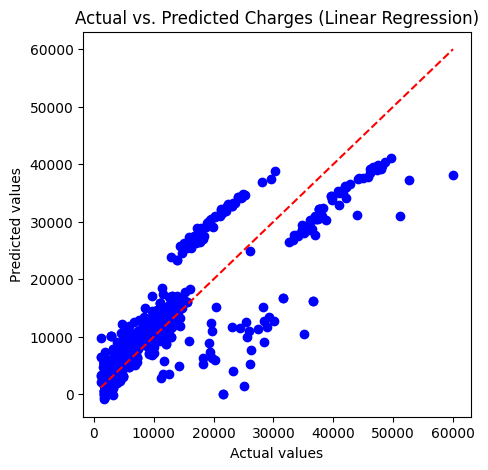

In [16]:
plt.figure(figsize=(5, 5))
plt.scatter(y_test, lr_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs. Predicted Charges (Linear Regression)')
plt.show()

# **Ridge Regression**

**Results**

In [17]:
ridge = RidgeCV().fit(X_train, y_train)
print("W coefficients: ", ridge.coef_)
print("W0 intercept: ", ridge.intercept_)

ridge_pred = ridge.predict(X_test)
print("Mean Squared Error (Ridge Regression):", mean_squared_error(y_test, ridge_pred))

W coefficients:  [ 1.14964380e+04 -2.24968980e+01  1.22436458e+04  2.66042075e+03
  2.40897631e+04 -1.09198273e+03]
W0 intercept:  -1744.4040095794862
Mean Squared Error (Ridge Regression): 38339067.007125415


**Visualization**

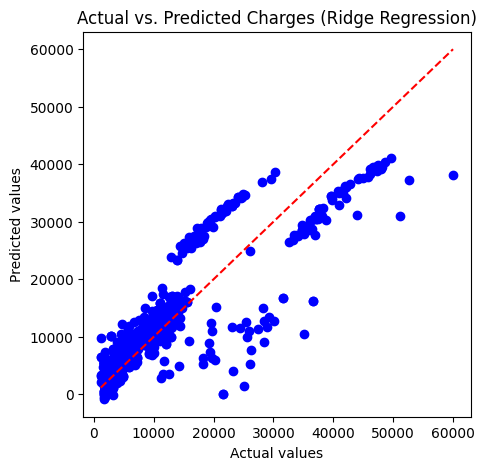

In [18]:
plt.figure(figsize=(5, 5))
plt.scatter(y_test, ridge_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs. Predicted Charges (Ridge Regression)')
plt.show()

# **Lasso regression**

**Results**

In [19]:
lasso = LassoCV().fit(X_train, y_train)
print("W coefficients: ", lasso.coef_)
print("W0 intercept: ", lasso.intercept_)

lasso_pred = lasso.predict(X_test)
print("Mean Squared Error (Lasso Regression):", mean_squared_error(y_test, lasso_pred))

W coefficients:  [11466.2282665     -0.         12086.33187442  2584.32551887
 24067.77485884 -1047.94293103]
W0 intercept:  -1680.9390429287323
Mean Squared Error (Lasso Regression): 38336729.82287477


**Visualization**

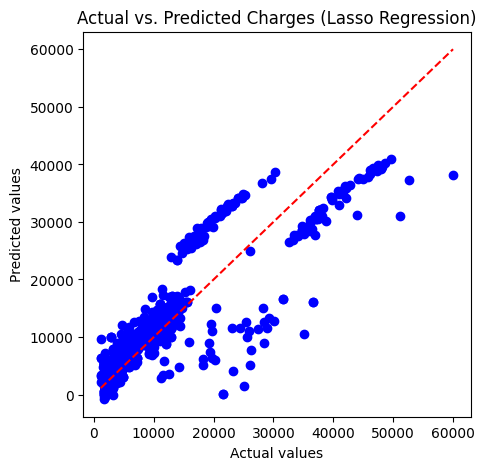

In [20]:
plt.figure(figsize=(5, 5))
plt.scatter(y_test, lasso_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs. Predicted Charges (Lasso Regression)')
plt.show()

# **Bayesian Ridge**

**Results**

In [21]:
bayesian = BayesianRidge().fit(X_train, y_train)
print("W coefficients: ", bayesian.coef_)
print("W0 intercept: ", bayesian.intercept_)

bayesian_pred = bayesian.predict(X_test)
print("Mean Squared Error (Bayesian Regression):", mean_squared_error(y_test, bayesian_pred))

W coefficients:  [ 1.14898560e+04 -2.12860281e+01  1.22134355e+04  2.65729034e+03
  2.40796605e+04 -1.08927430e+03]
W0 intercept:  -1728.7116786816841
Mean Squared Error (Bayesian Regression): 38336595.3311856


**Visualization**

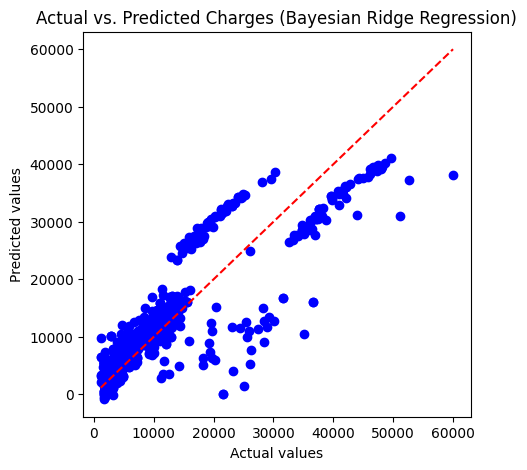

In [22]:
plt.figure(figsize=(5, 5))
plt.scatter(y_test, bayesian_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs. Predicted Charges (Bayesian Ridge Regression)')
plt.show()

# **Elastic Net Regression**

**Results**

In [23]:
elastic = ElasticNet(alpha = 0.1, l1_ratio = 0.3).fit(X_train, y_train)
print("W coefficients: ", elastic.coef_)
print("W0 intercept: ", elastic.intercept_)

elastic_pred = elastic.predict(X_test)
print("Mean Squared Error (Elastic Net Regression):", mean_squared_error(y_test, elastic_pred))

W coefficients:  [ 6826.08679814   476.15696659  3725.07994257  1226.02726576
 16773.81936623  -323.1932284 ]
W0 intercept:  4904.380991371214
Mean Squared Error (Elastic Net Regression): 50072843.17239665


**Visualization**

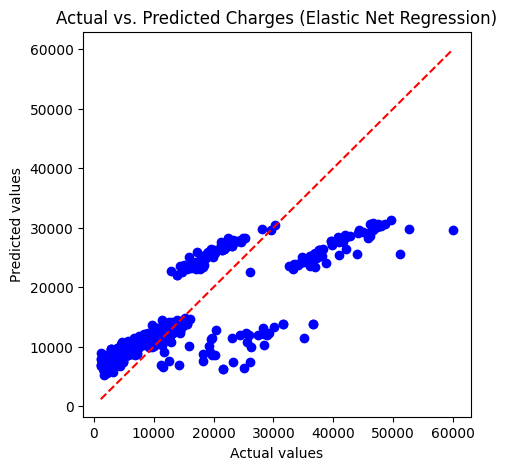

In [24]:
plt.figure(figsize=(5, 5))
plt.scatter(y_test, elastic_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs. Predicted Charges (Elastic Net Regression)')
plt.show()